In [1]:
#import pyarrow.feather as feather
import pandas as pd
import numpy as np
#from scipy.io import netcdf
import matplotlib.pyplot as plt 
import datetime
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [3]:
# it is better for visualisation if the columns date type (not int or str)
# when save df to csv, if the column names are date, they are saved as str
def convert_col_to_date(columns):
    
    # convert the columns type
    #columns = df.columns
    new_columns = []
    for col in columns:
        try:
            new_columns.append(pd.to_datetime(col).date())
        except: new_columns.append(col)
    return new_columns

In [5]:
# import freq df
k=2
freq_level =  pd.read_csv(f"dataset/modeling/sample{k}/freq_sample.csv").set_index("proj_id")
print(freq_level.shape)
print(" ")
print("details: ")
print(f"daily_freq: {freq_level[freq_level['daily']].shape}")
print(f"mid_weekly_freq: {freq_level[freq_level['mid_weekly']].shape}")
print(f"weekly_freq: {freq_level[freq_level['weekly']].shape}")
print(f"fortnight_freq: {freq_level[freq_level['fortnight']].shape}")
print(f"low_freq_freq: {freq_level[freq_level['low_freq']].shape}")

freq_level.sort_values(["freq", "length"])

(25, 7)
 
details: 
daily_freq: (5, 7)
mid_weekly_freq: (5, 7)
weekly_freq: (5, 7)
fortnight_freq: (5, 7)
low_freq_freq: (5, 7)


,daily,mid_weekly,weekly,fortnight,low_freq,length,freq
proj_id,,,,,,,
MV_22440001,True,False,False,False,False,1392,1
TH_4733900122,True,False,False,False,False,2163,1
BY_22022,True,False,False,False,False,3745,1
SH_10L57012002,True,False,False,False,False,4484,1
BE_5011,True,False,False,False,False,6508,1
TH_4931210611,False,True,False,False,False,527,4
MV_22430009,False,True,False,False,False,948,4
NI_40002942,False,True,False,False,False,1784,4
ST_38360119,False,True,False,False,False,2149,4


In [6]:
# import t s and convert into date type
grouped_t_s = pd.read_csv(f"dataset/modeling/sample{k}/sample_t_s.csv").set_index("proj_id")
grouped_t_s.columns = convert_col_to_date(grouped_t_s.columns)
print(grouped_t_s.shape)
grouped_t_s.head()

(25, 6546)


,length,freq,1995-01-01,1995-01-02,1995-01-03,1995-01-04,1995-01-05,1995-01-06,1995-01-07,1995-01-08,...,2012-11-21,2012-11-22,2012-11-23,2012-11-24,2012-11-25,2012-11-26,2012-11-27,2012-11-28,2012-11-29,2012-11-30
proj_id,,,,,,,,,,,,,,,,,,,,,
MV_22440001,1392,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,71.56000,71.55000,71.55000,71.54000,71.55000,71.55000,71.55000,71.55000,71.56000,71.55000
TH_4733900122,2163,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,142.18625,142.18025,142.18700,142.18700,142.19650,142.20375,142.20725,142.20675,142.22300,142.24850
BY_22022,3745,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,203.91523,203.92002,203.92002,203.92002,203.92002,203.92002,203.92960,203.94625,204.02563,204.09333
SH_10L57012002,4484,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.90000,6.89000,6.90500,6.90750
BE_5011,6508,1,36.57,36.53,36.27,36.22,36.24,36.38,36.33,36.29,...,37.02000,37.02000,37.01000,37.02000,37.08000,37.07000,37.13000,37.11000,37.17000,37.11000


In [7]:
# import ave_temp 
ave_temp = pd.read_csv(f"dataset/modeling/sample{k}/sample_temp.csv").set_index("proj_id")
ave_temp.columns = convert_col_to_date(ave_temp.columns)
print(ave_temp.shape)
ave_temp.head()


(25, 6546)


,length,freq,1995-01-01,1995-01-02,1995-01-03,1995-01-04,1995-01-05,1995-01-06,1995-01-07,1995-01-08,...,2012-11-21,2012-11-22,2012-11-23,2012-11-24,2012-11-25,2012-11-26,2012-11-27,2012-11-28,2012-11-29,2012-11-30
proj_id,,,,,,,,,,,,,,,,,,,,,
MV_22440001,1392,1,11.0,-7.0,-23.0,-57.0,-61.0,-76.0,-79.0,-57.0,...,52.0,65.0,43.0,47.0,66.0,70.0,69.0,50.0,35.0,14.0
TH_4733900122,2163,1,19.0,1.0,-19.0,-60.0,-78.0,-107.0,-76.0,-78.0,...,50.0,63.0,14.0,62.0,91.0,55.0,75.0,56.0,32.0,11.0
BY_22022,3745,1,22.0,2.0,-14.0,-59.0,-82.0,-71.0,-72.0,-63.0,...,40.0,50.0,49.0,64.0,83.0,50.0,73.0,59.0,34.0,14.0
SH_10L57012002,4484,1,7.0,4.0,-19.0,-59.0,-72.0,-59.0,-56.0,-38.0,...,57.0,80.0,59.0,45.0,74.0,76.0,70.0,51.0,34.0,8.0
BE_5011,6508,1,27.0,6.0,-3.0,-29.0,-51.0,-64.0,-50.0,-57.0,...,60.0,68.0,47.0,71.0,87.0,81.0,85.0,67.0,46.0,23.0


In [8]:
# import the cum_prec 
cum_prec=pd.read_csv(f"dataset/modeling/sample{k}/sample_prec.csv").set_index("proj_id")
cum_prec.columns = convert_col_to_date(cum_prec.columns)
print(cum_prec.shape)
cum_prec.head()

(25, 6546)


,length,freq,1995-01-01,1995-01-02,1995-01-03,1995-01-04,1995-01-05,1995-01-06,1995-01-07,1995-01-08,...,2012-11-21,2012-11-22,2012-11-23,2012-11-24,2012-11-25,2012-11-26,2012-11-27,2012-11-28,2012-11-29,2012-11-30
proj_id,,,,,,,,,,,,,,,,,,,,,
MV_22440001,1392,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,16.0,7.0,2.0,39.0,0.0,10.0,23.0,14.0
TH_4733900122,2163,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,18.0,37.0,101.0,70.0,0.0
BY_22022,3745,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,1.0,0.0,66.0,39.0,155.0,63.0,0.0
SH_10L57012002,4484,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,28.0,7.0,33.0,18.0,10.0,11.0,23.0,12.0
BE_5011,6508,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36.0,10.0,1.0,11.0,24.0,47.0,155.0,3.0


In [ ]:
###########################################################################################################

# func

In [9]:
# create df for a t s (one row in grouped_t_s df)
def create_one_ts_df(row):
    bgr = row.name
    idx = row.dropna().index[2:]
    ts = row[idx]
    temp = ave_temp[idx].loc[bgr]
    prec = cum_prec[idx].loc[bgr]
    df = pd.DataFrame({"ts":ts,"temp": temp,"prec":prec, })
    return df


# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


def split_df(reframed):
    # split into train and test sets, 
    values = reframed.values
    n_train = int(len(reframed)*0.8)
    train = values[:n_train, :]
    test = values[n_train:, :]
    # split into input and outputs
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    return train_X, train_y, test_X, test_y


# pick t s

In [34]:
# apply the func
ts1 = grouped_t_s.iloc[23]
print(f"ts length:{ts1[0]}, freq: {ts1[1]}")
df = create_one_ts_df(ts1)
print(df.shape)

ts length:257.0, freq: 30.0
(256, 3)


Text(0.5, 1.0, 'prec')

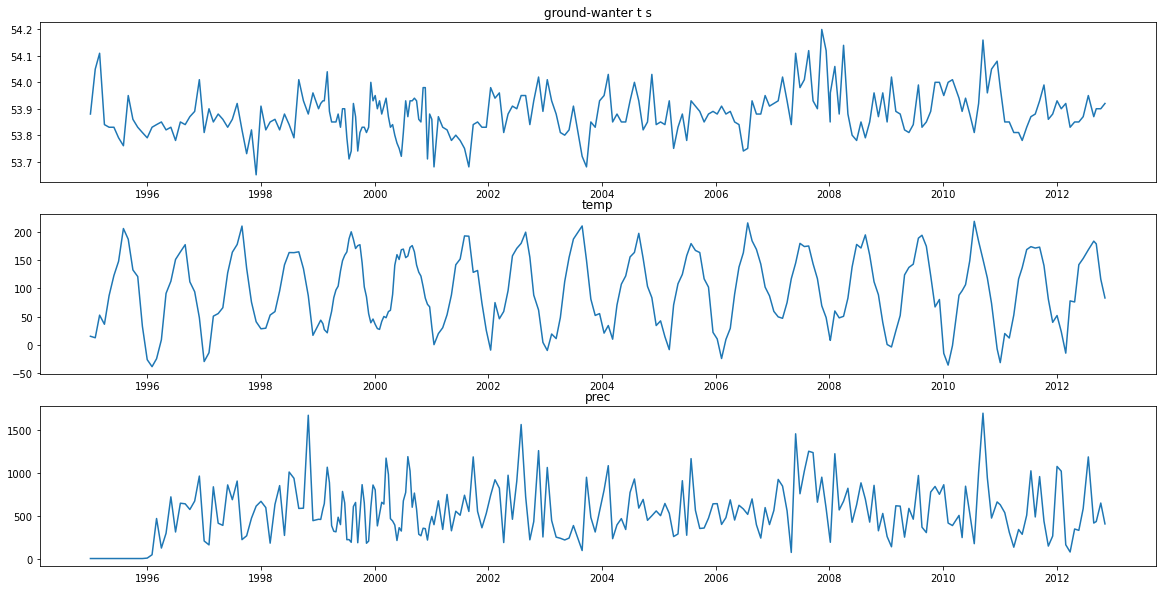

In [35]:
# plot a t s with its predictors
fig, axs = plt.subplots(3,1, figsize=(20,10))
#fig.suptitle('Vertically stacked subplots')
a,b = 0,750
axs[0].plot(df["ts"][a:b])
axs[0].set_title('ground-wanter t s')
axs[1].plot(df["temp"][a:b])
axs[1].set_title('temp')
axs[2].plot(df["prec"][a:b])
axs[2].set_title('prec')

# apply

(255, 4)
input to be 3D [samples, timesteps(lag, features]

train: (204, 1, 3) , (204,) ,test: (51, 1, 3) , (51,)
Epoch 1/50
3/3 - 2s - loss: 0.3912 - val_loss: 0.4336
Epoch 2/50
3/3 - 0s - loss: 0.3734 - val_loss: 0.4151
Epoch 3/50
3/3 - 0s - loss: 0.3556 - val_loss: 0.3966
Epoch 4/50
3/3 - 0s - loss: 0.3380 - val_loss: 0.3779
Epoch 5/50
3/3 - 0s - loss: 0.3204 - val_loss: 0.3589
Epoch 6/50
3/3 - 0s - loss: 0.3025 - val_loss: 0.3395
Epoch 7/50
3/3 - 0s - loss: 0.2847 - val_loss: 0.3198
Epoch 8/50
3/3 - 0s - loss: 0.2669 - val_loss: 0.2996
Epoch 9/50
3/3 - 0s - loss: 0.2492 - val_loss: 0.2789
Epoch 10/50
3/3 - 0s - loss: 0.2314 - val_loss: 0.2576
Epoch 11/50
3/3 - 0s - loss: 0.2137 - val_loss: 0.2356
Epoch 12/50
3/3 - 0s - loss: 0.1964 - val_loss: 0.2137
Epoch 13/50
3/3 - 0s - loss: 0.1801 - val_loss: 0.1927
Epoch 14/50
3/3 - 0s - loss: 0.1646 - val_loss: 0.1725
Epoch 15/50
3/3 - 0s - loss: 0.1495 - val_loss: 0.1533
Epoch 16/50
3/3 - 0s - loss: 0.1362 - val_loss: 0.1359
Epoch 17/50
3/3

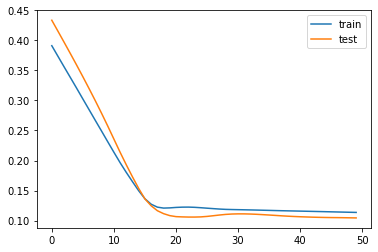

Test RMSE: 0.078


In [36]:
###############################################################

# convert the df to match lstm data
# load dataset
values = df.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[-2:], axis=1, inplace=True)
print(reframed.shape)
################################################################

train_X, train_y, test_X, test_y= split_df(reframed)
print("input to be 3D [samples, timesteps(lag, features]\n")
print(f"train: {train_X.shape} , {train_y.shape} ,test: {test_X.shape} , {test_y.shape}")
####################################################################

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
##############################################################################

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
##################################################################################

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = scaler.inverse_transform(np.concatenate((yhat, test_X[:, 1:]), axis=1))[:,0]
#inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
#inv_yhat = scaler.inverse_transform(inv_yhat)
#inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = scaler.inverse_transform(np.concatenate((test_y, test_X[:, 1:]), axis=1))[:,0]
#inv_y = scaler.inverse_transform(inv_y)
#inv_y = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
#####################################################################



# RMSE for sample2 t s[9] : 0.014

<AxesSubplot:>

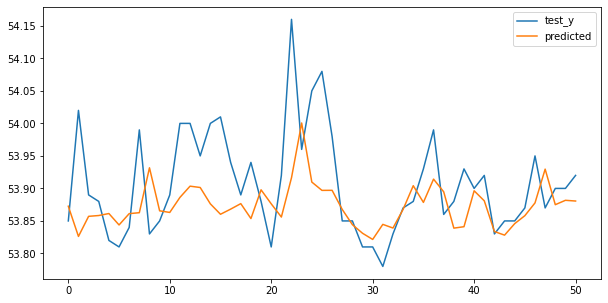

In [37]:
fd = pd.DataFrame([inv_y, inv_yhat]).T
fd.columns = ["test_y", "predicted"]
fd.plot(figsize=(10,5))

In [22]:
def f(df):
    # convert the df to match lstm data
    # load dataset
    values = df.values
    # ensure all data is float
    values = values.astype('float32')
    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)
    # frame as supervised learning
    reframed = series_to_supervised(scaled, 1, 1)
    # drop columns we don't want to predict
    reframed.drop(reframed.columns[-2:], axis=1, inplace=True)
    #print(reframed.shape)
    ################################################################

    train_X, train_y, test_X, test_y= split_df(reframed)
    #print("input to be 3D [samples, timesteps(lag, features]\n")
    #print(f"train: {train_X.shape} , {train_y.shape} ,test: {test_X.shape} , {test_y.shape}")
    ####################################################################

    # design network
    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    # fit network
    history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    ##############################################################################

    # plot history
    #plt.plot(history.history['loss'], label='train')
    #plt.plot(history.history['val_loss'], label='test')
    #plt.legend()
    #plt.show()
    ##################################################################################

    # make a prediction
    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    # invert scaling for forecast
    inv_yhat = scaler.inverse_transform(np.concatenate((yhat, test_X[:, 1:]), axis=1))[:,0]
    #inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
    #inv_yhat = scaler.inverse_transform(inv_yhat)
    #inv_yhat = inv_yhat[:,0]

    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = scaler.inverse_transform(np.concatenate((test_y, test_X[:, 1:]), axis=1))[:,0]
    #inv_y = scaler.inverse_transform(inv_y)
    #inv_y = inv_y[:,0]

    # calculate RMSE
    rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
    #print('Test RMSE: %.3f' % rmse)
    return rmse
    #####################################################################


In [23]:
err = []
for i in range(0,25):
    ts = grouped_t_s.iloc[i]
    df = create_one_ts_df(ts)
    #print(df.shape)
    rmse = f(df)
    err.append(rmse)
    


Epoch 1/50
16/16 - 2s - loss: 0.4407 - val_loss: 0.4845
Epoch 2/50
16/16 - 0s - loss: 0.3530 - val_loss: 0.3790
Epoch 3/50
16/16 - 0s - loss: 0.2781 - val_loss: 0.2706
Epoch 4/50
16/16 - 0s - loss: 0.2180 - val_loss: 0.1892
Epoch 5/50
16/16 - 0s - loss: 0.1829 - val_loss: 0.1526
Epoch 6/50
16/16 - 0s - loss: 0.1686 - val_loss: 0.1380
Epoch 7/50
16/16 - 0s - loss: 0.1622 - val_loss: 0.1298
Epoch 8/50
16/16 - 0s - loss: 0.1556 - val_loss: 0.1226
Epoch 9/50
16/16 - 0s - loss: 0.1480 - val_loss: 0.1150
Epoch 10/50
16/16 - 0s - loss: 0.1396 - val_loss: 0.1070
Epoch 11/50
16/16 - 0s - loss: 0.1305 - val_loss: 0.0988
Epoch 12/50
16/16 - 0s - loss: 0.1212 - val_loss: 0.0904
Epoch 13/50
16/16 - 0s - loss: 0.1116 - val_loss: 0.0819
Epoch 14/50
16/16 - 0s - loss: 0.1021 - val_loss: 0.0731
Epoch 15/50
16/16 - 0s - loss: 0.0927 - val_loss: 0.0633
Epoch 16/50
16/16 - 0s - loss: 0.0814 - val_loss: 0.0534
Epoch 17/50
16/16 - 0s - loss: 0.0701 - val_loss: 0.0434
Epoch 18/50
16/16 - 0s - loss: 0.0588 - 

42/42 - 0s - loss: 0.0069 - val_loss: 0.0076
Epoch 46/50
42/42 - 0s - loss: 0.0069 - val_loss: 0.0076
Epoch 47/50
42/42 - 0s - loss: 0.0068 - val_loss: 0.0075
Epoch 48/50
42/42 - 0s - loss: 0.0068 - val_loss: 0.0076
Epoch 49/50
42/42 - 0s - loss: 0.0068 - val_loss: 0.0077
Epoch 50/50
42/42 - 0s - loss: 0.0068 - val_loss: 0.0077
Epoch 1/50
50/50 - 3s - loss: 0.2521 - val_loss: 0.2242
Epoch 2/50
50/50 - 0s - loss: 0.0889 - val_loss: 0.1432
Epoch 3/50
50/50 - 0s - loss: 0.0848 - val_loss: 0.1331
Epoch 4/50
50/50 - 0s - loss: 0.0786 - val_loss: 0.1198
Epoch 5/50
50/50 - 0s - loss: 0.0724 - val_loss: 0.1057
Epoch 6/50
50/50 - 0s - loss: 0.0659 - val_loss: 0.0907
Epoch 7/50
50/50 - 0s - loss: 0.0589 - val_loss: 0.0745
Epoch 8/50
50/50 - 0s - loss: 0.0514 - val_loss: 0.0574
Epoch 9/50
50/50 - 0s - loss: 0.0438 - val_loss: 0.0395
Epoch 10/50
50/50 - 0s - loss: 0.0367 - val_loss: 0.0241
Epoch 11/50
50/50 - 0s - loss: 0.0298 - val_loss: 0.0175
Epoch 12/50
50/50 - 0s - loss: 0.0226 - val_loss: 0.

Epoch 41/50
6/6 - 0s - loss: 0.0389 - val_loss: 0.0263
Epoch 42/50
6/6 - 0s - loss: 0.0360 - val_loss: 0.0201
Epoch 43/50
6/6 - 0s - loss: 0.0345 - val_loss: 0.0185
Epoch 44/50
6/6 - 0s - loss: 0.0337 - val_loss: 0.0190
Epoch 45/50
6/6 - 0s - loss: 0.0327 - val_loss: 0.0194
Epoch 46/50
6/6 - 0s - loss: 0.0322 - val_loss: 0.0185
Epoch 47/50
6/6 - 0s - loss: 0.0318 - val_loss: 0.0173
Epoch 48/50
6/6 - 0s - loss: 0.0316 - val_loss: 0.0169
Epoch 49/50
6/6 - 0s - loss: 0.0314 - val_loss: 0.0168
Epoch 50/50
6/6 - 0s - loss: 0.0312 - val_loss: 0.0164
Epoch 1/50
11/11 - 2s - loss: 0.4948 - val_loss: 0.6318
Epoch 2/50
11/11 - 0s - loss: 0.4288 - val_loss: 0.5498
Epoch 3/50
11/11 - 0s - loss: 0.3707 - val_loss: 0.4694
Epoch 4/50
11/11 - 0s - loss: 0.3247 - val_loss: 0.3938
Epoch 5/50
11/11 - 0s - loss: 0.2926 - val_loss: 0.3269
Epoch 6/50
11/11 - 0s - loss: 0.2690 - val_loss: 0.2673
Epoch 7/50
11/11 - 0s - loss: 0.2509 - val_loss: 0.2139
Epoch 8/50
11/11 - 0s - loss: 0.2373 - val_loss: 0.1677
Ep

Epoch 36/50
24/24 - 0s - loss: 0.0165 - val_loss: 0.0141
Epoch 37/50
24/24 - 0s - loss: 0.0165 - val_loss: 0.0143
Epoch 38/50
24/24 - 0s - loss: 0.0165 - val_loss: 0.0140
Epoch 39/50
24/24 - 0s - loss: 0.0164 - val_loss: 0.0137
Epoch 40/50
24/24 - 0s - loss: 0.0164 - val_loss: 0.0135
Epoch 41/50
24/24 - 0s - loss: 0.0163 - val_loss: 0.0131
Epoch 42/50
24/24 - 0s - loss: 0.0164 - val_loss: 0.0133
Epoch 43/50
24/24 - 0s - loss: 0.0162 - val_loss: 0.0131
Epoch 44/50
24/24 - 0s - loss: 0.0163 - val_loss: 0.0127
Epoch 45/50
24/24 - 0s - loss: 0.0163 - val_loss: 0.0131
Epoch 46/50
24/24 - 0s - loss: 0.0162 - val_loss: 0.0129
Epoch 47/50
24/24 - 0s - loss: 0.0162 - val_loss: 0.0129
Epoch 48/50
24/24 - 0s - loss: 0.0162 - val_loss: 0.0127
Epoch 49/50
24/24 - 0s - loss: 0.0162 - val_loss: 0.0128
Epoch 50/50
24/24 - 0s - loss: 0.0161 - val_loss: 0.0124
Epoch 1/50
35/35 - 2s - loss: 0.2196 - val_loss: 0.0959
Epoch 2/50
35/35 - 0s - loss: 0.1319 - val_loss: 0.1094
Epoch 3/50
35/35 - 0s - loss: 0.1

6/6 - 0s - loss: 0.0517 - val_loss: 0.0476
Epoch 34/50
6/6 - 0s - loss: 0.0486 - val_loss: 0.0448
Epoch 35/50
6/6 - 0s - loss: 0.0458 - val_loss: 0.0428
Epoch 36/50
6/6 - 0s - loss: 0.0431 - val_loss: 0.0410
Epoch 37/50
6/6 - 0s - loss: 0.0406 - val_loss: 0.0383
Epoch 38/50
6/6 - 0s - loss: 0.0389 - val_loss: 0.0368
Epoch 39/50
6/6 - 0s - loss: 0.0374 - val_loss: 0.0360
Epoch 40/50
6/6 - 0s - loss: 0.0363 - val_loss: 0.0353
Epoch 41/50
6/6 - 0s - loss: 0.0353 - val_loss: 0.0346
Epoch 42/50
6/6 - 0s - loss: 0.0347 - val_loss: 0.0340
Epoch 43/50
6/6 - 0s - loss: 0.0342 - val_loss: 0.0338
Epoch 44/50
6/6 - 0s - loss: 0.0338 - val_loss: 0.0339
Epoch 45/50
6/6 - 0s - loss: 0.0334 - val_loss: 0.0338
Epoch 46/50
6/6 - 0s - loss: 0.0331 - val_loss: 0.0337
Epoch 47/50
6/6 - 0s - loss: 0.0329 - val_loss: 0.0334
Epoch 48/50
6/6 - 0s - loss: 0.0327 - val_loss: 0.0336
Epoch 49/50
6/6 - 0s - loss: 0.0325 - val_loss: 0.0334
Epoch 50/50
6/6 - 0s - loss: 0.0323 - val_loss: 0.0332
Epoch 1/50
8/8 - 3s - 

Epoch 32/50
10/10 - 0s - loss: 0.0671 - val_loss: 0.0548
Epoch 33/50
10/10 - 0s - loss: 0.0668 - val_loss: 0.0548
Epoch 34/50
10/10 - 0s - loss: 0.0664 - val_loss: 0.0544
Epoch 35/50
10/10 - 0s - loss: 0.0662 - val_loss: 0.0542
Epoch 36/50
10/10 - 0s - loss: 0.0659 - val_loss: 0.0541
Epoch 37/50
10/10 - 0s - loss: 0.0657 - val_loss: 0.0540
Epoch 38/50
10/10 - 0s - loss: 0.0655 - val_loss: 0.0537
Epoch 39/50
10/10 - 0s - loss: 0.0654 - val_loss: 0.0538
Epoch 40/50
10/10 - 0s - loss: 0.0652 - val_loss: 0.0537
Epoch 41/50
10/10 - 0s - loss: 0.0650 - val_loss: 0.0536
Epoch 42/50
10/10 - 0s - loss: 0.0649 - val_loss: 0.0536
Epoch 43/50
10/10 - 0s - loss: 0.0647 - val_loss: 0.0535
Epoch 44/50
10/10 - 0s - loss: 0.0646 - val_loss: 0.0533
Epoch 45/50
10/10 - 0s - loss: 0.0645 - val_loss: 0.0532
Epoch 46/50
10/10 - 0s - loss: 0.0644 - val_loss: 0.0532
Epoch 47/50
10/10 - 0s - loss: 0.0642 - val_loss: 0.0531
Epoch 48/50
10/10 - 0s - loss: 0.0641 - val_loss: 0.0530
Epoch 49/50
10/10 - 0s - loss: 

Epoch 31/50
6/6 - 0s - loss: 0.1066 - val_loss: 0.0738
Epoch 32/50
6/6 - 0s - loss: 0.1041 - val_loss: 0.0720
Epoch 33/50
6/6 - 0s - loss: 0.1018 - val_loss: 0.0705
Epoch 34/50
6/6 - 0s - loss: 0.0994 - val_loss: 0.0695
Epoch 35/50
6/6 - 0s - loss: 0.0972 - val_loss: 0.0686
Epoch 36/50
6/6 - 0s - loss: 0.0949 - val_loss: 0.0675
Epoch 37/50
6/6 - 0s - loss: 0.0926 - val_loss: 0.0665
Epoch 38/50
6/6 - 0s - loss: 0.0902 - val_loss: 0.0656
Epoch 39/50
6/6 - 0s - loss: 0.0878 - val_loss: 0.0650
Epoch 40/50
6/6 - 0s - loss: 0.0855 - val_loss: 0.0647
Epoch 41/50
6/6 - 0s - loss: 0.0832 - val_loss: 0.0641
Epoch 42/50
6/6 - 0s - loss: 0.0809 - val_loss: 0.0628
Epoch 43/50
6/6 - 0s - loss: 0.0786 - val_loss: 0.0611
Epoch 44/50
6/6 - 0s - loss: 0.0762 - val_loss: 0.0593
Epoch 45/50
6/6 - 0s - loss: 0.0737 - val_loss: 0.0581
Epoch 46/50
6/6 - 0s - loss: 0.0715 - val_loss: 0.0573
Epoch 47/50
6/6 - 0s - loss: 0.0695 - val_loss: 0.0566
Epoch 48/50
6/6 - 0s - loss: 0.0675 - val_loss: 0.0560
Epoch 49/5

Epoch 4/50
2/2 - 0s - loss: 0.3184 - val_loss: 0.3705
Epoch 5/50
2/2 - 0s - loss: 0.3065 - val_loss: 0.3571
Epoch 6/50
2/2 - 0s - loss: 0.2945 - val_loss: 0.3437
Epoch 7/50
2/2 - 0s - loss: 0.2828 - val_loss: 0.3306
Epoch 8/50
2/2 - 0s - loss: 0.2712 - val_loss: 0.3177
Epoch 9/50
2/2 - 0s - loss: 0.2599 - val_loss: 0.3052
Epoch 10/50
2/2 - 0s - loss: 0.2493 - val_loss: 0.2941
Epoch 11/50
2/2 - 0s - loss: 0.2391 - val_loss: 0.2829
Epoch 12/50
2/2 - 0s - loss: 0.2295 - val_loss: 0.2717
Epoch 13/50
2/2 - 0s - loss: 0.2206 - val_loss: 0.2618
Epoch 14/50
2/2 - 0s - loss: 0.2122 - val_loss: 0.2529
Epoch 15/50
2/2 - 0s - loss: 0.2046 - val_loss: 0.2446
Epoch 16/50
2/2 - 0s - loss: 0.1976 - val_loss: 0.2370
Epoch 17/50
2/2 - 0s - loss: 0.1913 - val_loss: 0.2296
Epoch 18/50
2/2 - 0s - loss: 0.1855 - val_loss: 0.2222
Epoch 19/50
2/2 - 0s - loss: 0.1800 - val_loss: 0.2158
Epoch 20/50
2/2 - 0s - loss: 0.1753 - val_loss: 0.2102
Epoch 21/50
2/2 - 0s - loss: 0.1712 - val_loss: 0.2051
Epoch 22/50
2/2 

Epoch 40/50
3/3 - 0s - loss: 0.1254 - val_loss: 0.1539
Epoch 41/50
3/3 - 0s - loss: 0.1232 - val_loss: 0.1516
Epoch 42/50
3/3 - 0s - loss: 0.1210 - val_loss: 0.1492
Epoch 43/50
3/3 - 0s - loss: 0.1187 - val_loss: 0.1469
Epoch 44/50
3/3 - 0s - loss: 0.1165 - val_loss: 0.1445
Epoch 45/50
3/3 - 0s - loss: 0.1142 - val_loss: 0.1421
Epoch 46/50
3/3 - 0s - loss: 0.1119 - val_loss: 0.1397
Epoch 47/50
3/3 - 0s - loss: 0.1096 - val_loss: 0.1373
Epoch 48/50
3/3 - 0s - loss: 0.1074 - val_loss: 0.1351
Epoch 49/50
3/3 - 0s - loss: 0.1052 - val_loss: 0.1328
Epoch 50/50
3/3 - 0s - loss: 0.1030 - val_loss: 0.1307
Epoch 1/50
3/3 - 2s - loss: 0.3931 - val_loss: 0.4318
Epoch 2/50
3/3 - 0s - loss: 0.3721 - val_loss: 0.4099
Epoch 3/50
3/3 - 0s - loss: 0.3509 - val_loss: 0.3878
Epoch 4/50
3/3 - 0s - loss: 0.3299 - val_loss: 0.3653
Epoch 5/50
3/3 - 0s - loss: 0.3088 - val_loss: 0.3425
Epoch 6/50
3/3 - 0s - loss: 0.2876 - val_loss: 0.3192
Epoch 7/50
3/3 - 0s - loss: 0.2662 - val_loss: 0.2954
Epoch 8/50
3/3 - 

# plot RMSE for all t s in the sample

Text(0, 0.5, 'RMSE ')

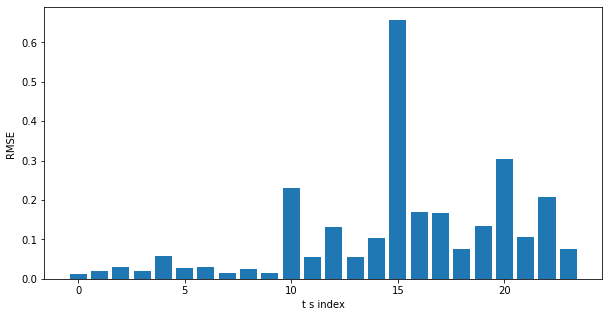

In [42]:
# plot err (rmse) for all t s in the smple 
plt.figure(figsize=(10,5))
plt.bar(range(0,len(err)-1), err[:-1])
plt.xlabel("t s index")
plt.ylabel("RMSE ")


In [33]:
freq_level

,daily,mid_weekly,weekly,fortnight,low_freq,length,freq
proj_id,,,,,,,
MV_22440001,True,False,False,False,False,1392,1
TH_4733900122,True,False,False,False,False,2163,1
BY_22022,True,False,False,False,False,3745,1
SH_10L57012002,True,False,False,False,False,4484,1
BE_5011,True,False,False,False,False,6508,1
TH_4931210611,False,True,False,False,False,527,4
MV_22430009,False,True,False,False,False,948,4
NI_40002942,False,True,False,False,False,1784,4
ST_38360119,False,True,False,False,False,2149,4
